<a href="https://colab.research.google.com/github/Rmohanty385/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


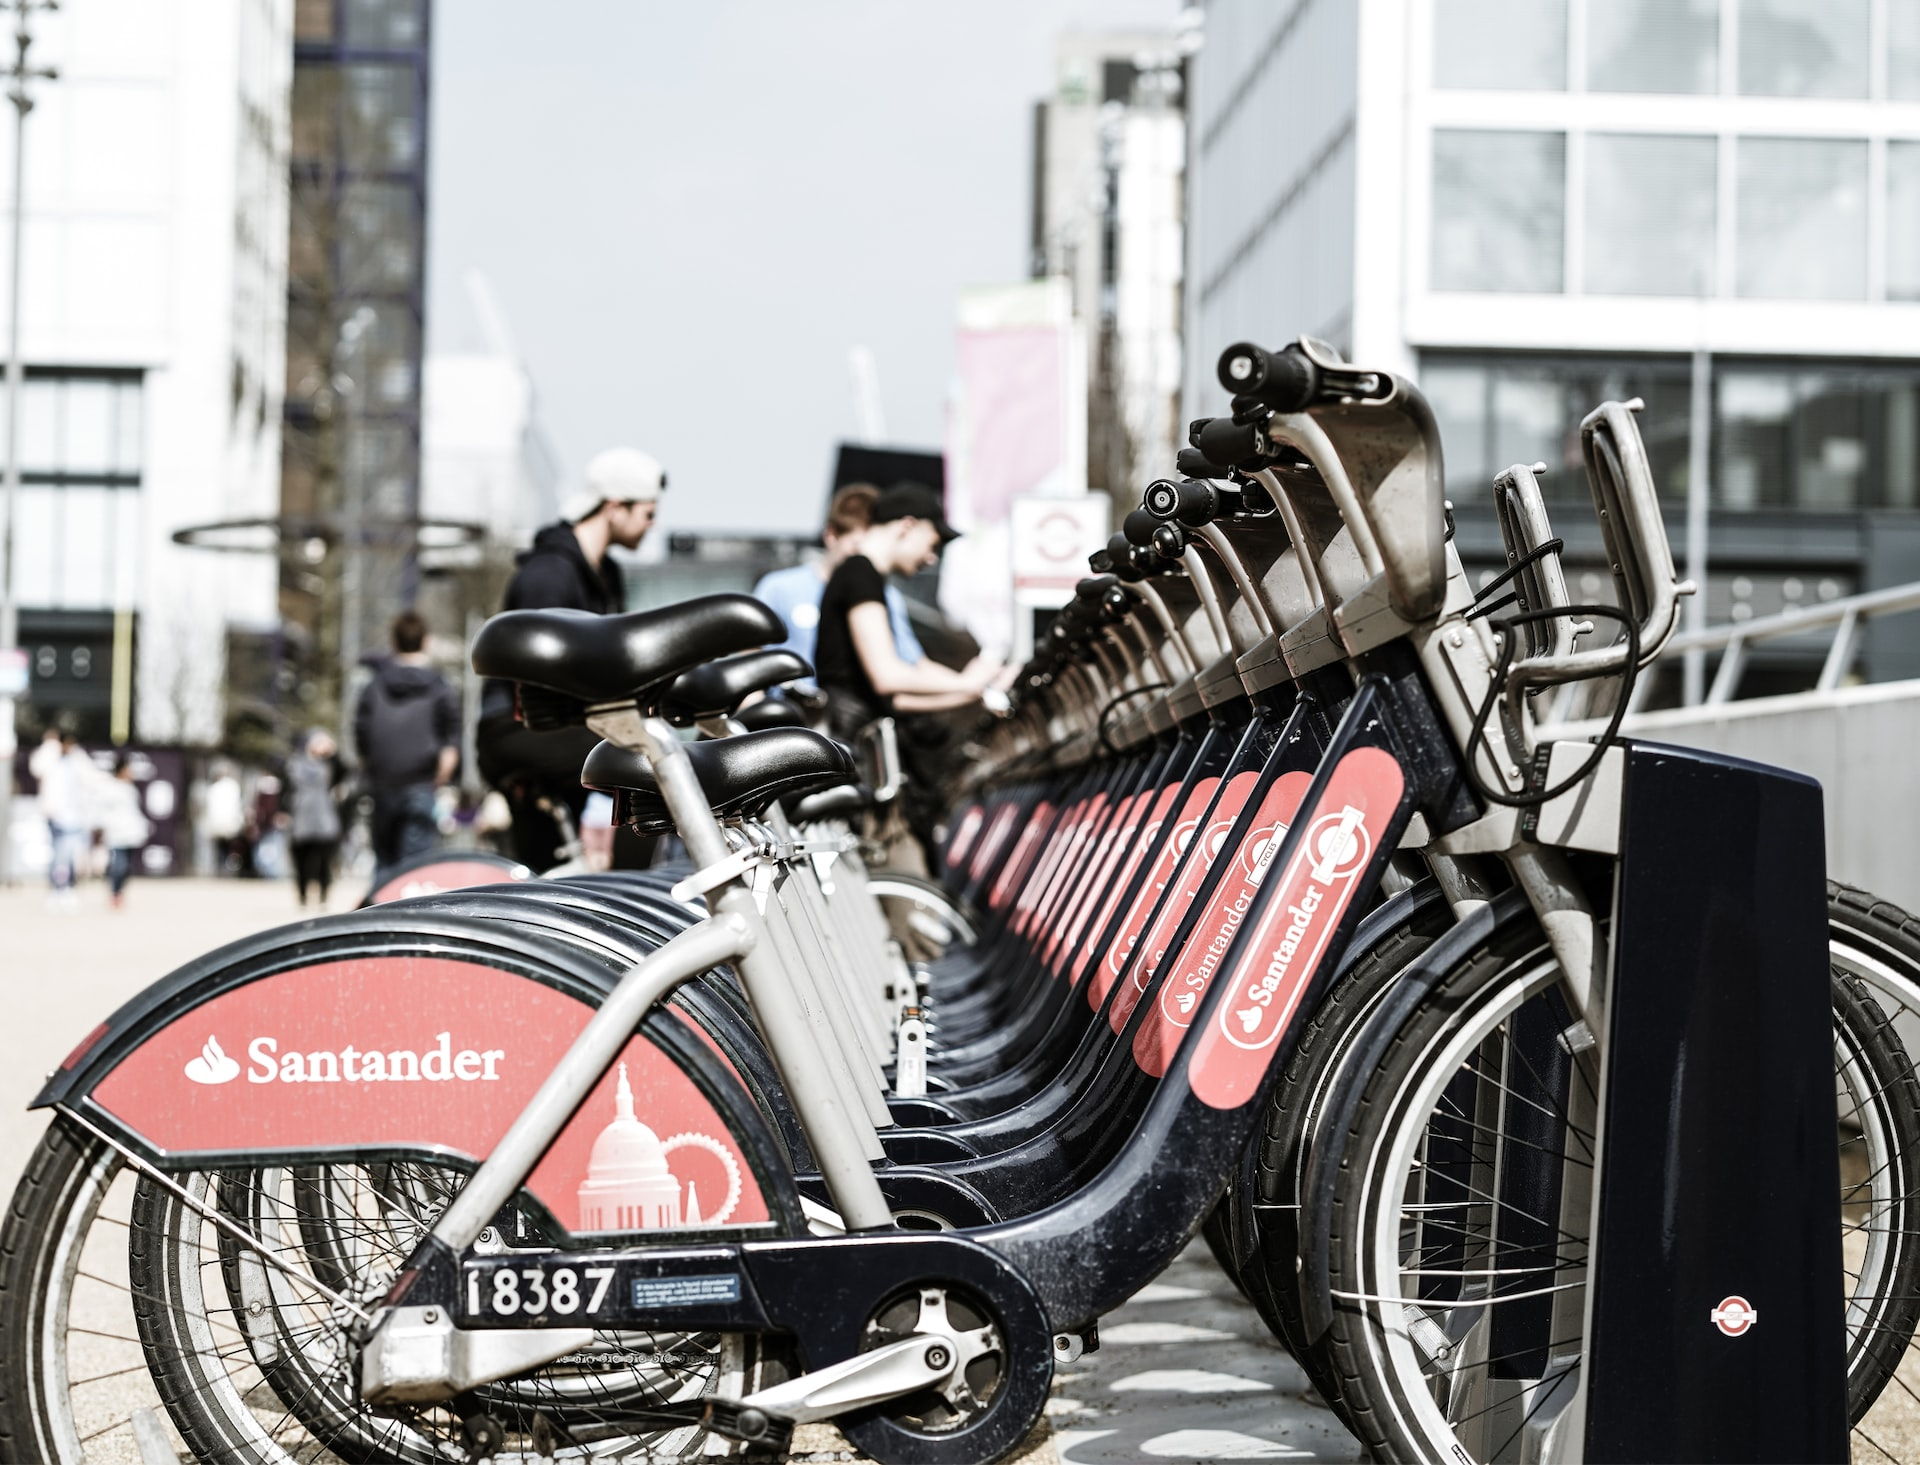

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [160]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [161]:
# file path of dataset

data='/content/SeoulBikeData.csv'

In [162]:
df = pd.read_csv(data, encoding = "ISO-8859-1")

#***Exploratory data analysis***

In [163]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [164]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [165]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [166]:
#checking shape of data
df.shape

(8760, 14)

In [167]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [168]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [169]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [170]:
# Date columns to Date format conversion

df['Date']= pd.to_datetime(df['Date'])

In [171]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

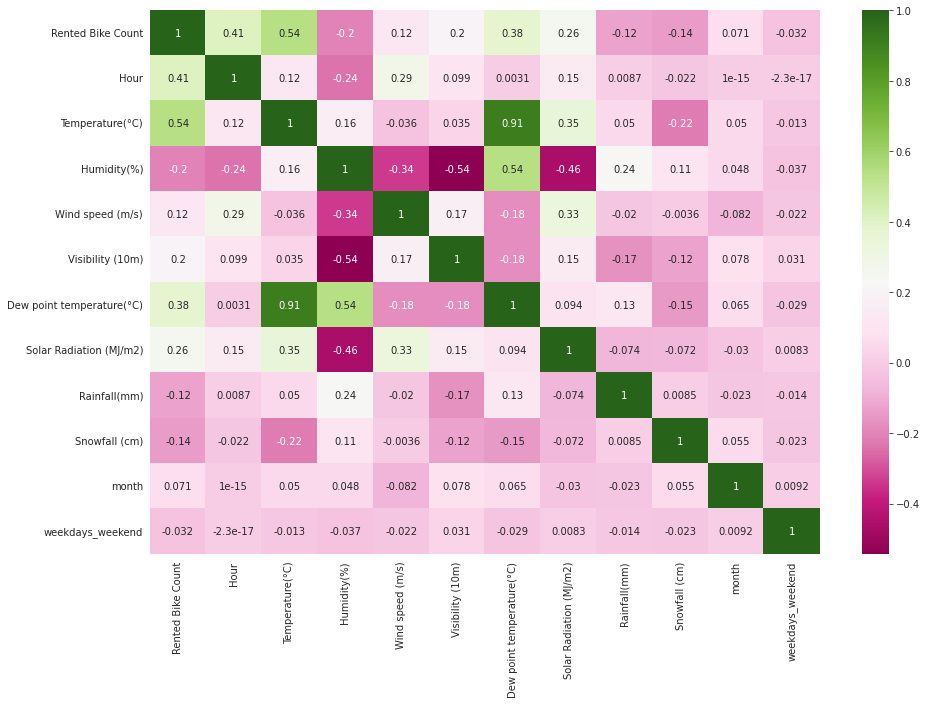

In [172]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [173]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [174]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

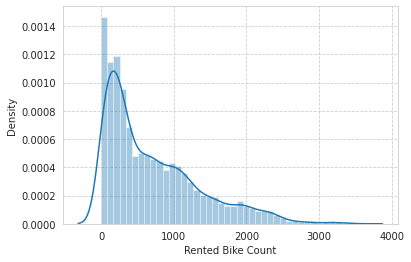

In [175]:
#visualising distribution

sns.distplot(df['Rented Bike Count'])

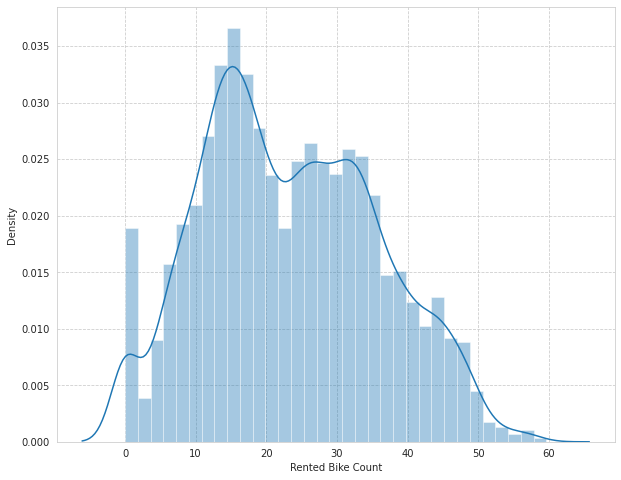

In [176]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

In [177]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

In [178]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [179]:
# describing numeric feature

numeric_features.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

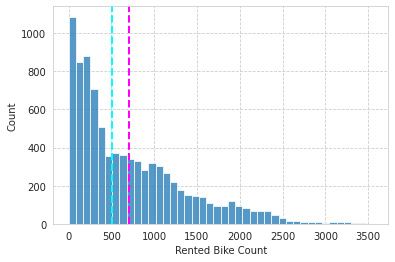

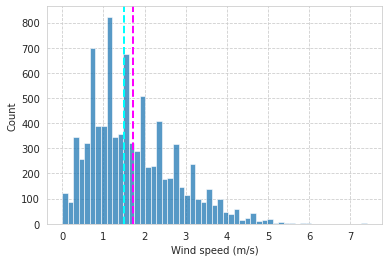

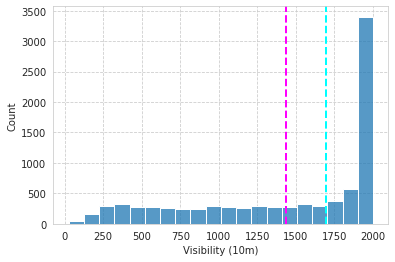

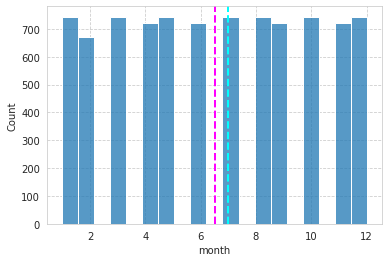

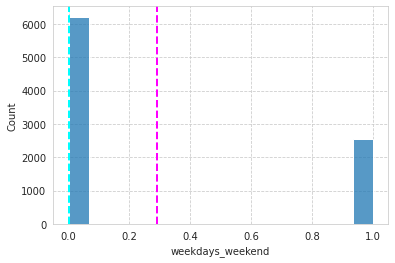

In [180]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

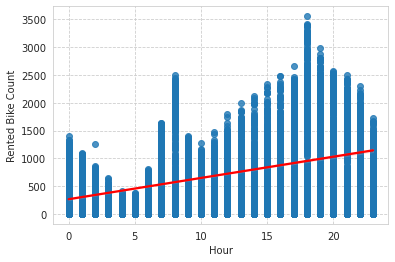

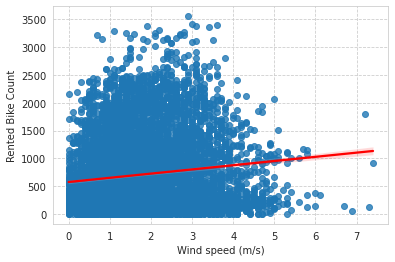

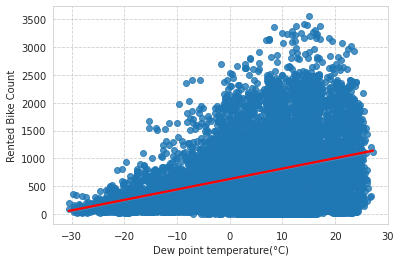

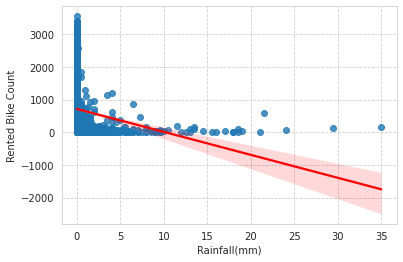

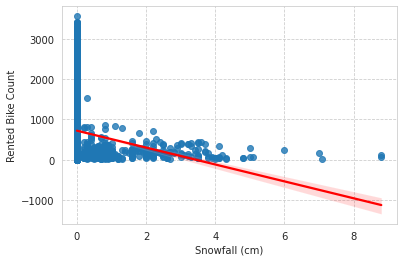

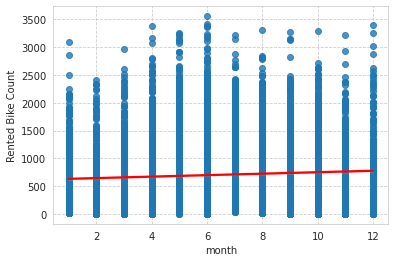

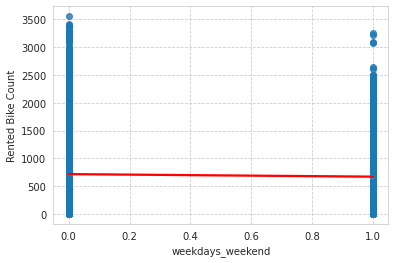

In [181]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [182]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [183]:
categorical_features

Seasons     Holiday Functioning Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

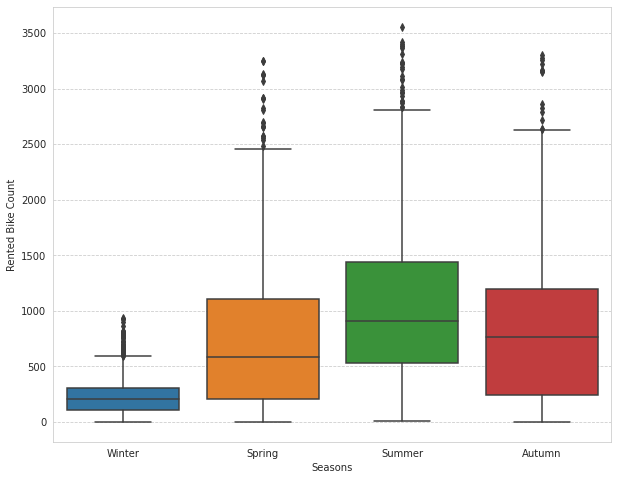

In [184]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

In [185]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [186]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=df)

**Conclusion**

we can clearly see that there is less demand of rented bike during winter season

In [187]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

**Conclusion**

 

*   High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
*   we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand





In [188]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [189]:
dummy_categorical_feature

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [190]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [191]:
#showing head of final df
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0                    1                254     0             -5.2           37   
1                    1                204     1             -5.5           38   
2                    1                173     2             -6.0           39   
3                    1                107     3             -6.2           40   
4                    1                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                      0.0           0.0            0.0      1   
1                      0.0           0.0            0.0      1   
2                      0.0           0.0            0.0      1   
3                      0.0           0.0            0.0      1   
4                      0.0           0.0            0.0      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [192]:
#describing final DF
final_df.describe().transpose()

count         mean         std   min     25%  \
Seasons_Spring             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Summer             8760.0     0.252055    0.434217   0.0    0.00   
Seasons_Winter             8760.0     0.246575    0.431042   0.0    0.00   
Holiday_No Holiday         8760.0     0.950685    0.216537   0.0    1.00   
Functioning Day_Yes        8760.0     0.966324    0.180404   0.0    1.00   
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   
weekdays_weekend           8760.0     0.290411    0.453978   0.0    0.00   

                               50%      75%      max  
Seasons_Spring                0.00     1.00     1.00  
Seasons_Summer                0.00     1.00     1.00  
Seasons_Winter                0.00     0.00     1.00  
Holiday_No Holiday            1.00     1.00     1.00  
Functioning Day_Yes           1.00     1.00     1.00  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80  
month                         7.00    10.00    12.00  
weekdays_weekend              0.00     1.00     1.00

<Figure size 2000x1600 with 0 Axes>

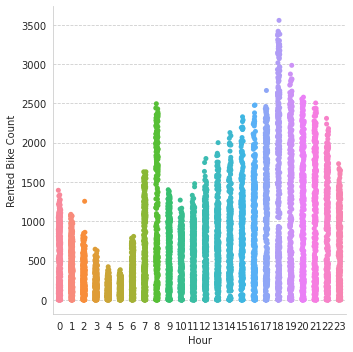

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

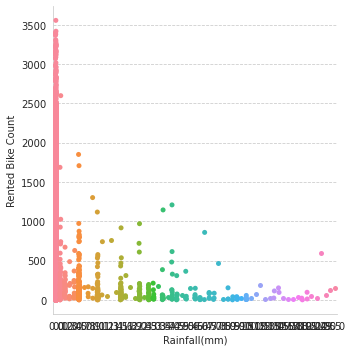

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

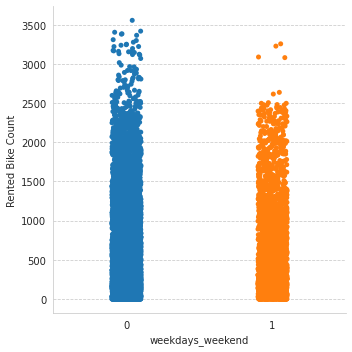

In [193]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df)
  plt.show()

**Conclusion:**

**From hour v/s rented bike**

*   we can clearly see there is high demand of Rented bike between the office hours.

**From working-nonworking v/s rented bike**

*   As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

**From Rainfall v/s rented bike**

*   we can see that if Rainfall increase demand of Rented Bike Decreases

**From Snowfall v/s rented bike**

*   we can see that if Snowfall increase demand of Rented Bike Decreases

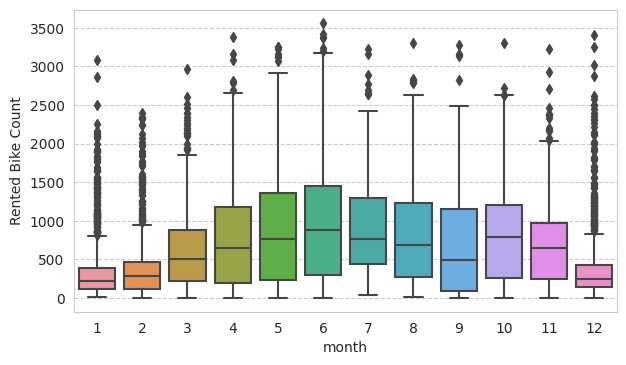

In [194]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

**Conclusion:**


*   we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons
*   Also demand of bike is maximum during May,june,july i.e Summer seasons


#**Functions**

#**Creating Function to train linear models and calculate scores**

In [195]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [196]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

#Creating function to run diffirent models

In [197]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

#Creating function to get feature importance

In [198]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#***Train | Test Split for LR***

In [199]:
# Train - Spliting  data
X=final_df.drop(['Rented Bike Count'],axis=1)

In [200]:
X.shape

(8760, 16)

In [201]:
y=np.sqrt(final_df['Rented Bike Count'])

In [202]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [203]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

#***Linear Regresseion***

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
#linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332062
RMSE : 419.035264474627
R2 : 0.5729108337712393
Adjusted R2 :  0.5697661367350404

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



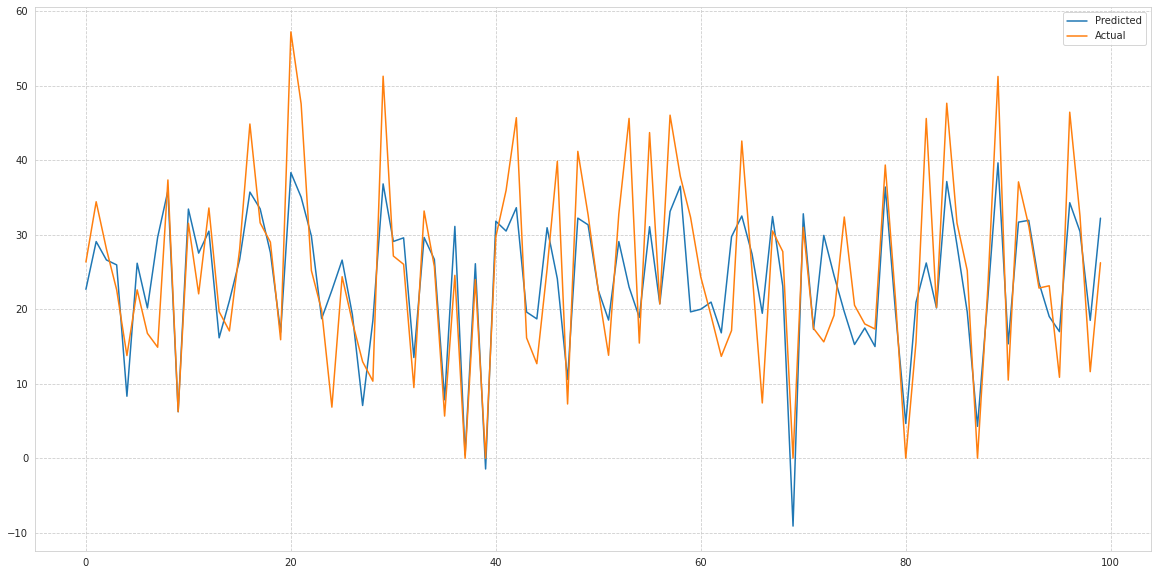

In [206]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#***Regularisation***

#**Lasso Regression**

In [207]:
from sklearn.linear_model import Lasso

In [208]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



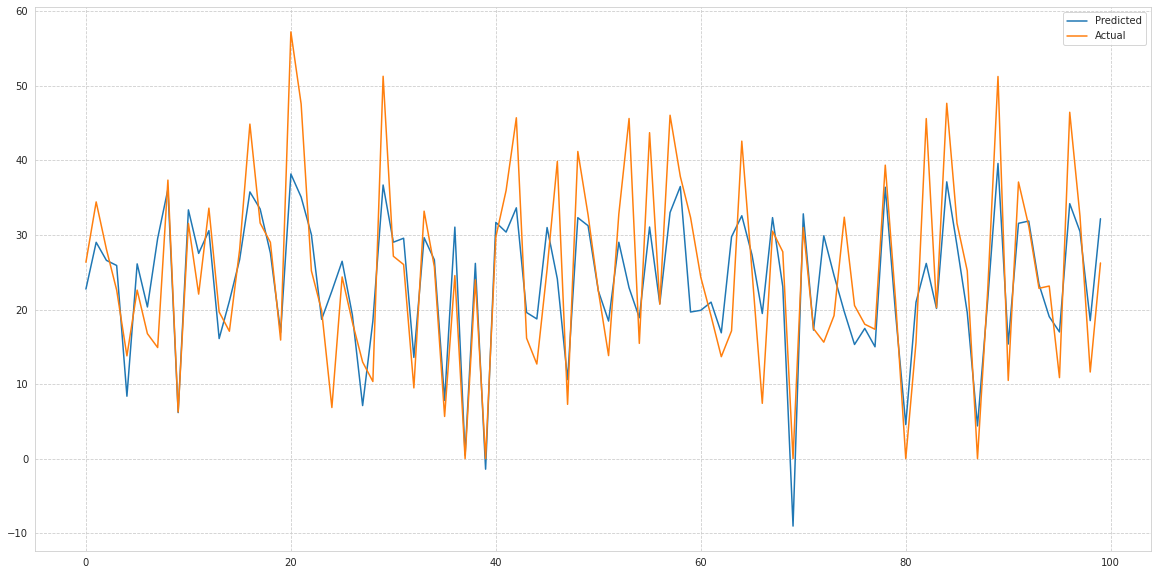

In [209]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

#**Ridge Regression**

In [210]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



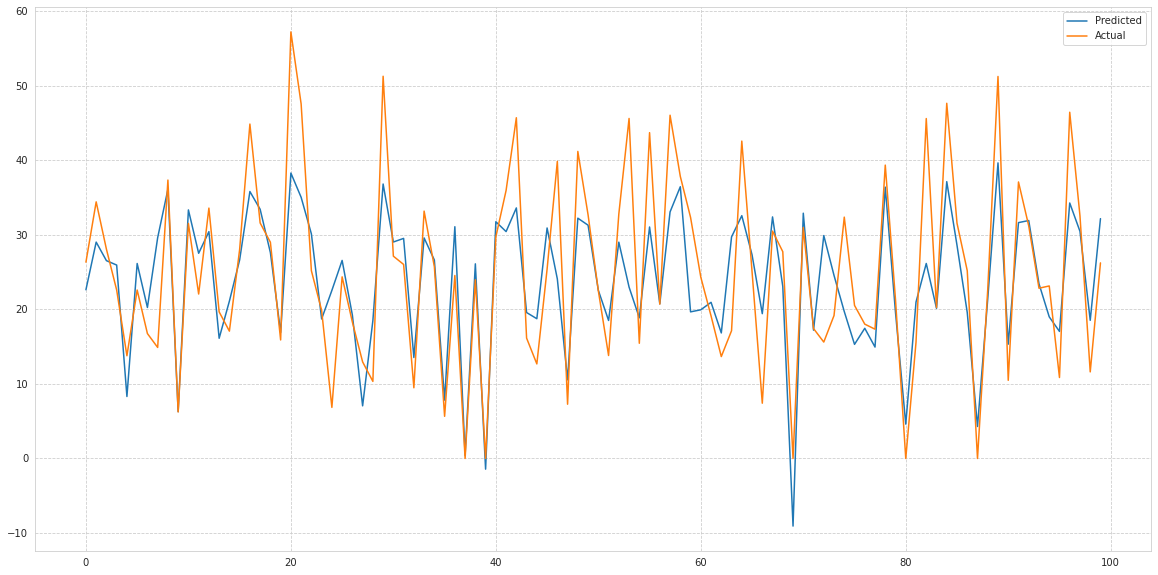

In [211]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

#**ElasticNet Regression**

In [212]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



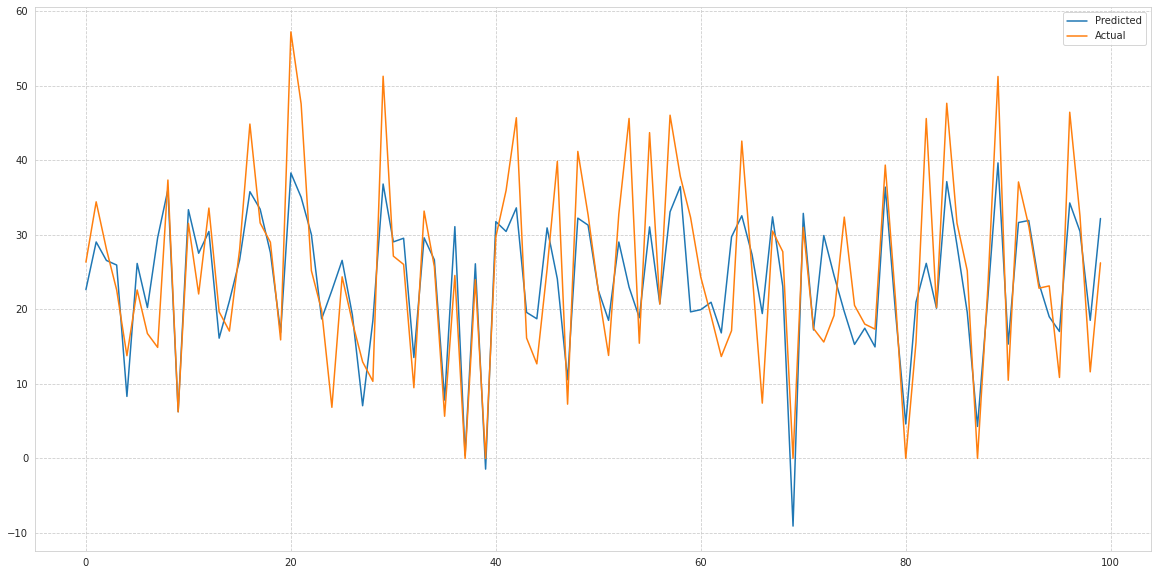

In [213]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

#**Polynomial Regression**

In [214]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [215]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 116294.5376400951
RMSE : 341.01984933445607
R2 : 0.717136620934838
Adjusted R2 :  0.7150538717102441

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



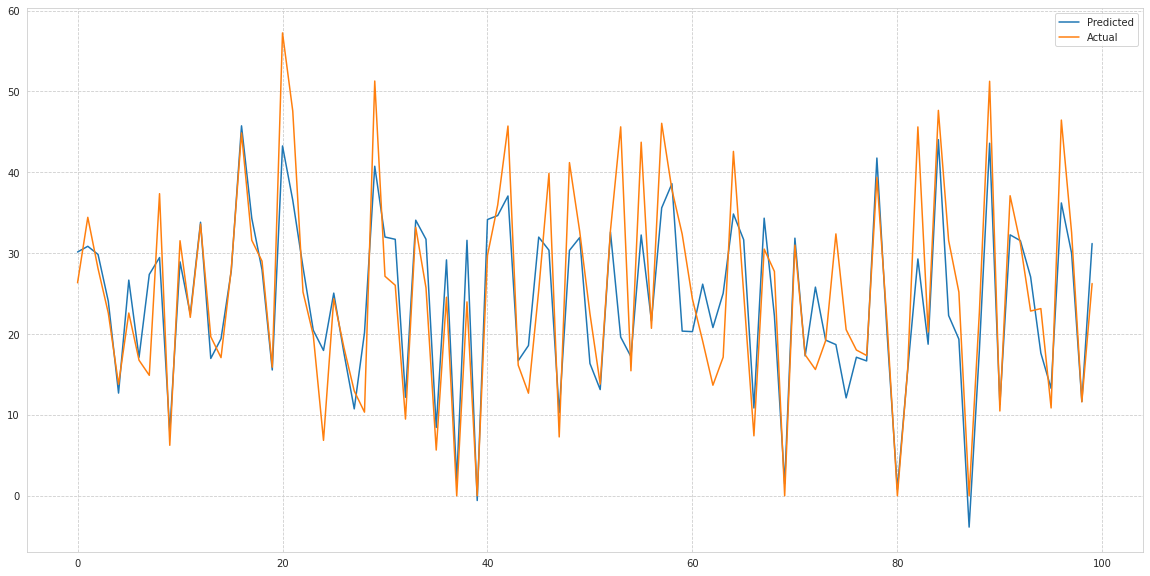

In [216]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

#***KNN and Tree Based Method***

#**Train | Test split Data For Tree based methods**

In [217]:
#creatin X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [218]:
#creating y for dependent variable
y=final_df['Rented Bike Count']

In [219]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#***KNN Regression***

In [220]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [221]:
#creating model
scaler = MinMaxScaler()

In [222]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83411.75920852358
RMSE : 288.81094025075225
R2 : 0.7961594359879383
Adjusted R2 :  0.7946585390600998

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



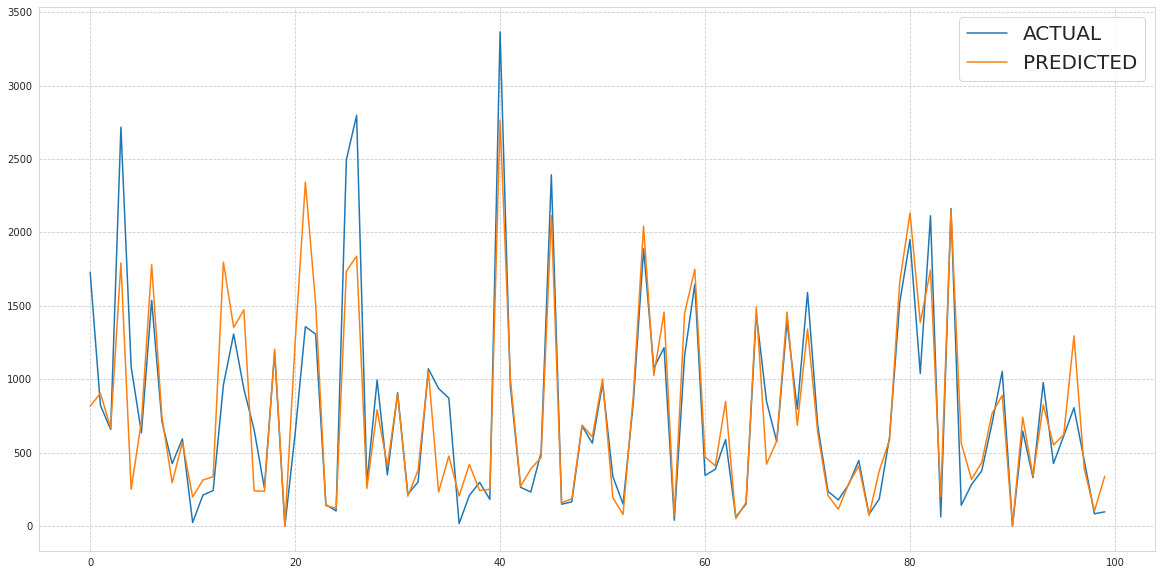

In [223]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

#**Decision Tree Regression**

In [224]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 90400.39817351598
RMSE : 300.6665897194365
R2 : 0.7790806916739692
Adjusted R2 :  0.7774540423719828

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



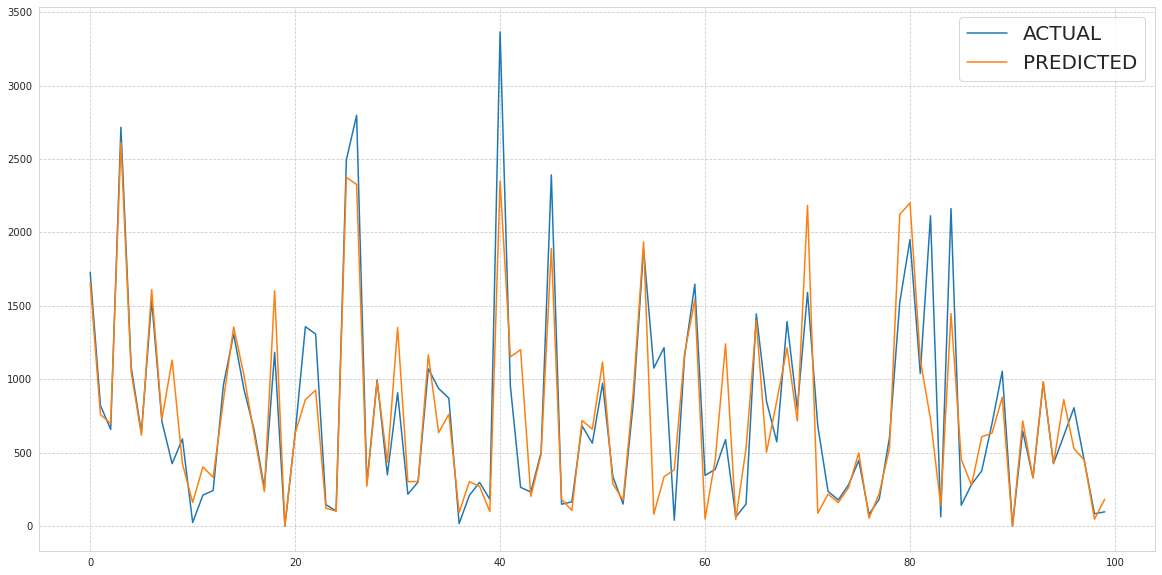

In [225]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

In [226]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

#**Random Forest**

In [227]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [228]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [229]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [230]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

In [153]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)


================Evalution Matrix=========================

MSE : 62336.822295767575
RMSE : 249.67343129729997
R2 : 0.8476620906205456
Adjusted R2 :  0.8465404125027034

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



In [154]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

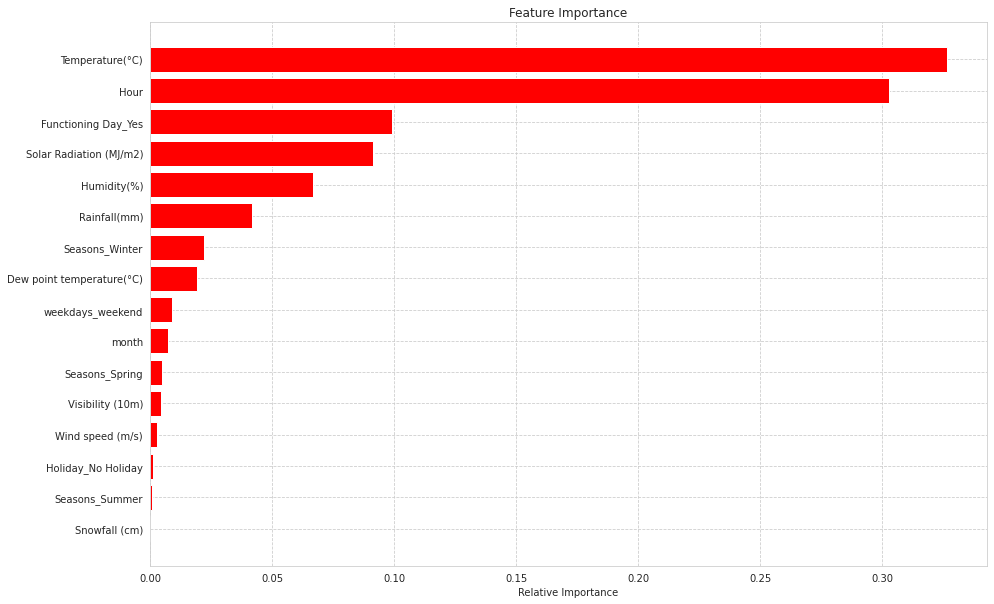

In [155]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

#**Gradient Boosting**

In [156]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [157]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [158]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [159]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

In [231]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)


================Evalution Matrix=========================

MSE : 54880.702269458925
RMSE : 234.26630630429747
R2 : 0.8658832590256483
Adjusted R2 :  0.8648957450562099

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



In [232]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

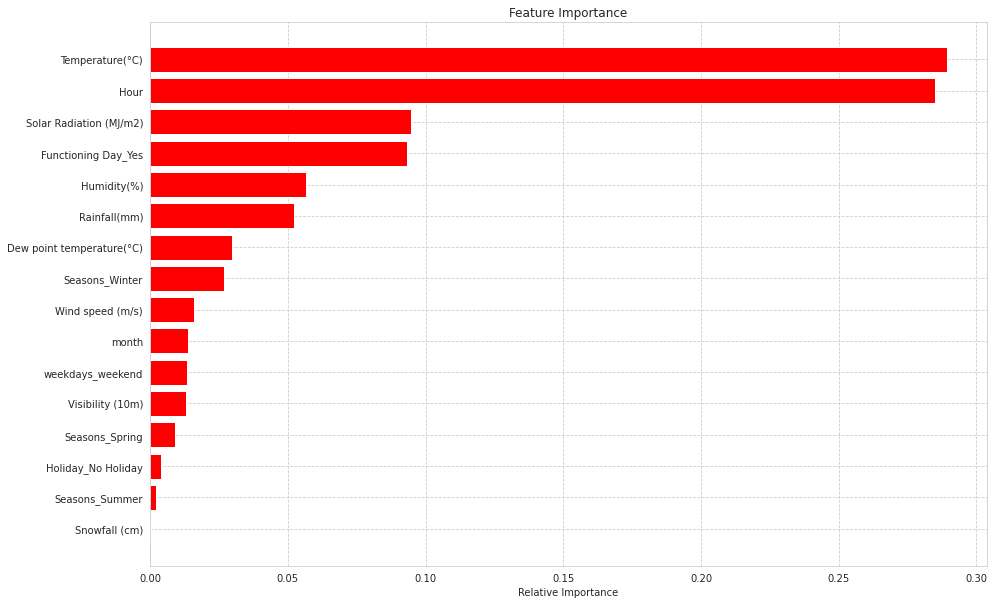

In [233]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

#**eXtreme Gradient Boosting**

In [239]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [240]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [241]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [242]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

In [243]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

[07:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:13:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [244]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

In [245]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)